# Домашнее задание по курсу "Микропроцессорная и биомедицинская техника"

###### 1. Ускорение преобразования Фурье
* 1.1. Необходимо написать программу, выполняющую преобразование Фурье над случайно последовательностью из 4096 чисел (воспользуйтесь модулем fft из библиотеки numpy https://numpy.org/doc/stable/reference/routines.fft.html), замерить время исполнения программы).
* 1.2. Напишите программу, последовательно выполняющую операцию Фурье-преобразования над двумя случайными последовательностями из 4096 чисел, замерьте время выполнения.
* 1.3. Напишите программу, которая выполняет Фурье-преобразования над двумя последовательностями из 4096 случаных числе, но при этом каждая последовательность должна обрабатываться в отдельных потоках (воспользуйтесь библиотекой threading https://docs.python.org/3/library/threading.html), замерьте время исполнения каждого потока отдельно и всей программы.
* 1.4. Сравните значения замеров времени из пунктов 1.1, 1.2 и 1.3 и объясните полученные результаты.


##### 1.1. Необходимо написать программу, выполняющую преобразование Фурье над случайно последовательностью из 4096 чисел (воспользуйтесь модулем fft из библиотеки numpy https://numpy.org/doc/stable/reference/routines.fft.html), замерить время исполнения программы).

In [2]:
import numpy as np
import time

In [78]:
N = 100000

In [79]:
# Генерация случайной последовательности
seq = np.random.rand(N)

In [80]:
# Замер времени исполнения
start_time = time.time()
fft_result = np.fft.fft(seq)
end_time = time.time()

print(f"Время исполнения преобразования Фурье: {end_time - start_time:.9f} сек")

Время исполнения преобразования Фурье: 0.002992153 сек


In [82]:
%%timeit

fft_result1 = np.fft.fft(seq)

3.06 ms ± 35.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


##### 1.2. Напишите программу, последовательно выполняющую операцию Фурье-преобразования над двумя случайными последовательностями из 4096 чисел, замерьте время выполнения.

In [83]:
# Генерация двух случайных последовательностей
seq1 = np.random.rand(N)
seq2 = np.random.rand(N)

In [93]:
# Замер времени исполнения
start_time = time.time()
fft_result1 = np.fft.fft(seq1)
fft_result2 = np.fft.fft(seq2)
end_time = time.time()

print(f"Время исполнения преобразования Фурье для двух последовательностей: {end_time - start_time} сек")

Время исполнения преобразования Фурье для двух последовательностей: 0.006981372833251953 сек


In [87]:
%%timeit

fft_result1 = np.fft.fft(seq1)
fft_result2 = np.fft.fft(seq2)

6.15 ms ± 58 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


##### 1.3. Напишите программу, которая выполняет Фурье-преобразования над двумя последовательностями из 4096 случаных числе, но при этом каждая последовательность должна обрабатываться в отдельных потоках (воспользуйтесь библиотекой threading https://docs.python.org/3/library/threading.html), замерьте время исполнения каждого потока отдельно и всей программы.

In [150]:
import threading

In [151]:
# Генерация двух случайных последовательностей
seq1 = np.random.rand(N)
seq2 = np.random.rand(N)

In [152]:
# Функция расчета преобразования Фурье
def fft_thread(seq, thread_name):
    start_time = time.time()
    np.fft.fft(seq)
    end_time = time.time()
    print(f"Время выполнения преобразования Фурье в потоке {thread_name}: {end_time - start_time} секунд")

In [155]:
# Создание потоков
thread1 = threading.Thread(target=fft_thread, args=(seq1, "Поток 1"))
thread2 = threading.Thread(target=fft_thread, args=(seq2, "Поток 2"))

# Замер времени исполнения
start_time = time.time()

# Запуск потоков
thread1.start()
thread2.start()

# Ожидание завершения потоков
thread1.join()
thread2.join()

end_time = time.time()

print(f"Время исполнения параллельного преобразования Фурье: {end_time - start_time} сек")

Время выполнения преобразования Фурье в потоке Поток 1: 0.003988504409790039 секунд
Время выполнения преобразования Фурье в потоке Поток 2: 0.0039899349212646484 секунд
Время исполнения параллельного преобразования Фурье: 0.004986286163330078 сек


##### 1.4. Сравните значения замеров времени из пунктов 1.1, 1.2 и 1.3 и объясните полученные результаты.

*Преобразование Фурье одной последовательности:*

Время исполнения составило 0,002992 сек. Это базовое время, необходимое для выполнения преобразования Фурье над одной последовательностью.

*Последовательное преобразование Фурье двух последовательностей:*

Время исполнения составило 0,006981 сек. Это время примерно в два раза больше, чем время для одной последовательности, так как операции выполняются последовательно.

*Параллельное преобразование Фурье двух последовательностей:*

* Поток 1: 0,003988 сек

* Поток 2: 0,003989 сек

* Общее время исполнения: 0,004986 сек

Время исполнения каждого потока примерно одинаково и немного больше, чем время для одной последовательности, что может быть связано с накладными расходами на создание и управление потоками.

Общее время исполнения параллельного преобразования Фурье меньше, чем время последовательного преобразования двух последовательностей. Это указывает на то, что параллельное выполнение операций действительно ускоряет процесс.

###### 2. Ускорение ожидания преобразования Фурье
* 2.1. Напишите программу, которая выполняет преобразование Фурье последовательности из 4096 случайных чисел а затем синхронно “зависает” на 2 с (используйте функцию sleep). Замерьте время исполнения программы.
* 2.2. Напишите программу, которая в одном потоке запускает преобразование Фурье и ожидание (как в п. 2.1), а во втором потоке запускает преобразование Фурье другой случайной последовательност из 4096 чисел без ожидания. Замерьте время исполнения каждого потока отельно и всей программы в целом.
* 2.3. Сравните значения замеров времени, полеченные в п. 2.1, 2.2 и 1.3, и объясните полученные результаты


##### 2.1. Напишите программу, которая выполняет преобразование Фурье последовательности из 4096 случайных чисел а затем синхронно “зависает” на 2 с (используйте функцию sleep). Замерьте время исполнения программы.

In [156]:
# Генерация случайной последовательности
seq = np.random.rand(N)

In [157]:
# Замер времени исполнения
start_time = time.time()
fft_result = np.fft.fft(seq)
time.sleep(2)
end_time = time.time()

print(f"Время исполнения преобразования Фурье с ожиданием: {end_time - start_time} сек")

Время исполнения преобразования Фурье с ожиданием: 2.0044119358062744 сек


In [158]:
%%timeit
 
fft_result = np.fft.fft(seq)
time.sleep(2)    

2.01 s ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


##### 2.2. Напишите программу, которая в одном потоке запускает преобразование Фурье и ожидание (как в п. 2.1), а во втором потоке запускает преобразование Фурье другой случайной последовательност из 4096 чисел без ожидания. Замерьте время исполнения каждого потока отельно и всей программы в целом.

In [177]:
def fft_with_sleep(seq, thread_name):
    start_time = time.time()
    np.fft.fft(seq)
    time.sleep(2)
    end_time = time.time()
    print(f"Время выполнения преобразования Фурье в потоке {thread_name}: {end_time - start_time} секунд")

def fft_without_sleep(seq, thread_name):
    start_time = time.time()
    np.fft.fft(seq)
    end_time = time.time()
    print(f"Время выполнения преобразования Фурье в потоке {thread_name}: {end_time - start_time} секунд")

In [178]:
# Генерация двух случайных последовательностей
seq1 = np.random.rand(N)
seq2 = np.random.rand(N)

In [179]:
# Создание потоков
thread1 = threading.Thread(target=fft_with_sleep, args=(seq1, "Поток с ожиданием"))
thread2 = threading.Thread(target=fft_without_sleep, args=(seq2, "Поток без ожидания"))

# Замер времени исполнения
start_time = time.time()

# Запуск потоков
thread1.start()
thread2.start()

# Ожидание завершения потоков
thread1.join()
thread2.join()

end_time = time.time()

print(f"Время исполнения параллельного преобразования Фурье с ожиданием и без ожидания: {end_time - start_time} сек")

Время выполнения преобразования Фурье в потоке Поток без ожидания: 0.004986763000488281 секунд
Время выполнения преобразования Фурье в потоке Поток с ожиданием: 2.0047740936279297 секунд
Время исполнения параллельного преобразования Фурье с ожиданием и без ожидания: 2.00583553314209 сек


##### 2.3. Сравните значения замеров времени, полеченные в п. 2.1, 2.2 и 1.3, и объясните полученные результаты

*Преобразование Фурье с ожиданием:*

Время исполнения составило 2,004412 сек. Это время включает в себя время выполнения преобразования Фурье и 2 секунды ожидания.

*Параллельное преобразование Фурье с ожиданием и без ожидания:*

* Поток без ожидания: 0,004987 сек

* Поток с ожиданием: 2,004774 сек

* Общее время исполнения: 2,005836 сек

Время исполнения потока без ожидания (0,004987 сек) значительно меньше, чем время исполнения потока с ожиданием (2,004774 сек). Это ожидаемо, так как поток с ожиданием тратит 2 секунды на ожидание.

Общее время исполнения параллельного преобразования Фурье с ожиданием и без ожидания (2,005836 сек) примерно равно времени исполнения потока с ожиданием. Это указывает на то, что поток без ожидания завершил свою работу быстро, и основное время исполнения определяется потоком с ожиданием.

Таким образом:

* Параллельное выполнение операций с ожиданием и без ожидания позволяет эффективно использовать время, когда один поток ожидает.

* Сравнение с пунктом 1.3 показывает, что параллельное выполнение операций может значительно ускорить процесс, особенно если одна из операций требует ожидания.

###### 3. Исследуем объем используемой динамической памяти
* 3.1. Напишите программу, которая создает пустой объект класса list а затем в цикле заполняет данный список числами от 1 до 4096
* 3.2. После каждого добавления нового элемента в список добавьте замер используемой процессом памяти (используйте psutil https://psutil.readthedocs.io/en/latest/index.html)
* 3.3. Постройте зависимость используемой памяти от номера итерации цикла, объясните полученный результат.
* 3.4. Повторите пункты 3.1, 3.2 и 3.3 для структуры данных dict (ключи и значения – случайные числа)



##### 3.1. Напишите программу, которая создает пустой объект класса list а затем в цикле заполняет данный список числами от 1 до 4096
##### 3.2. После каждого добавления нового элемента в список добавьте замер используемой процессом памяти (используйте psutil https://psutil.readthedocs.io/en/latest/index.html)

In [4]:
import psutil

In [1]:
# Создание пустого списка
list = []

# Замер используемой памяти
memory_usage = []

for i in range(1, 4097):
    list.append(i)
    memory_usage.append(psutil.Process().memory_info().rss)

# Вывод зависимости используемой памяти от номера итерации
for i, mem in enumerate(memory_usage):
    print(f"Итерация {i+1}: Используемая память = {mem} байт")

Итерация 1: Используемая память = 70791168 байт
Итерация 2: Используемая память = 70791168 байт
Итерация 3: Используемая память = 70791168 байт
Итерация 4: Используемая память = 70791168 байт
Итерация 5: Используемая память = 70791168 байт
Итерация 6: Используемая память = 70791168 байт
Итерация 7: Используемая память = 70791168 байт
Итерация 8: Используемая память = 70791168 байт
Итерация 9: Используемая память = 70791168 байт
Итерация 10: Используемая память = 70791168 байт
Итерация 11: Используемая память = 70791168 байт
Итерация 12: Используемая память = 70791168 байт
Итерация 13: Используемая память = 70791168 байт
Итерация 14: Используемая память = 70791168 байт
Итерация 15: Используемая память = 70791168 байт
Итерация 16: Используемая память = 70791168 байт
Итерация 17: Используемая память = 70791168 байт
Итерация 18: Используемая память = 70791168 байт
Итерация 19: Используемая память = 70791168 байт
Итерация 20: Используемая память = 70791168 байт
Итерация 21: Используемая пам

##### 3.3. Постройте зависимость используемой памяти от номера итерации цикла, объясните полученный результат.

In [8]:
import matplotlib.pyplot as plt

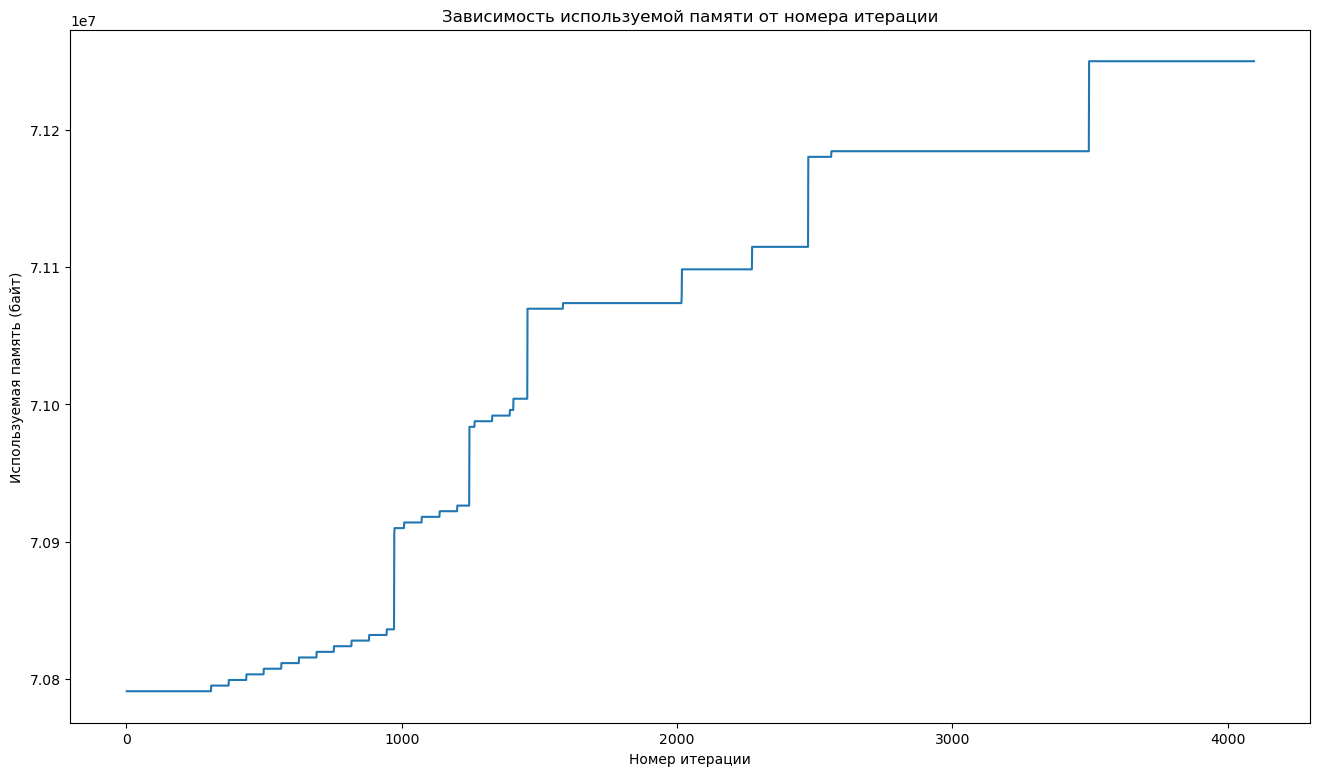

In [3]:
# Построение графика
plt.figure(figsize=(16, 9))
plt.plot(range(1, 4097), memory_usage)
plt.xlabel('Номер итерации')
plt.ylabel('Используемая память (байт)')
plt.title('Зависимость используемой памяти от номера итерации')
plt.show()

##### Выводы:

* Используемая память будет постепенно увеличиваться с каждой итерацией, так как каждый новый элемент добавляется в список.


##### 3.4. Повторите пункты 3.1, 3.2 и 3.3 для структуры данных dict (ключи и значения – случайные числа)

In [5]:
import random

In [6]:
# Создание пустого словаря
my_dict = {}

# Замер используемой памяти
memory_usage = []

for i in range(1, 4097):
    key = random.randint(1, 10000)
    value = random.randint(1, 10000)
    my_dict[key] = value
    memory_usage.append(psutil.Process().memory_info().rss)

# Вывод зависимости используемой памяти от номера итерации
for i, mem in enumerate(memory_usage):
    print(f"Итерация {i+1}: Используемая память = {mem} байт")


Итерация 1: Используемая память = 87044096 байт
Итерация 2: Используемая память = 87044096 байт
Итерация 3: Используемая память = 87044096 байт
Итерация 4: Используемая память = 87044096 байт
Итерация 5: Используемая память = 87044096 байт
Итерация 6: Используемая память = 87044096 байт
Итерация 7: Используемая память = 87044096 байт
Итерация 8: Используемая память = 87044096 байт
Итерация 9: Используемая память = 87044096 байт
Итерация 10: Используемая память = 87044096 байт
Итерация 11: Используемая память = 87044096 байт
Итерация 12: Используемая память = 87044096 байт
Итерация 13: Используемая память = 87044096 байт
Итерация 14: Используемая память = 87044096 байт
Итерация 15: Используемая память = 87044096 байт
Итерация 16: Используемая память = 87044096 байт
Итерация 17: Используемая память = 87044096 байт
Итерация 18: Используемая память = 87044096 байт
Итерация 19: Используемая память = 87044096 байт
Итерация 20: Используемая память = 87044096 байт
Итерация 21: Используемая пам

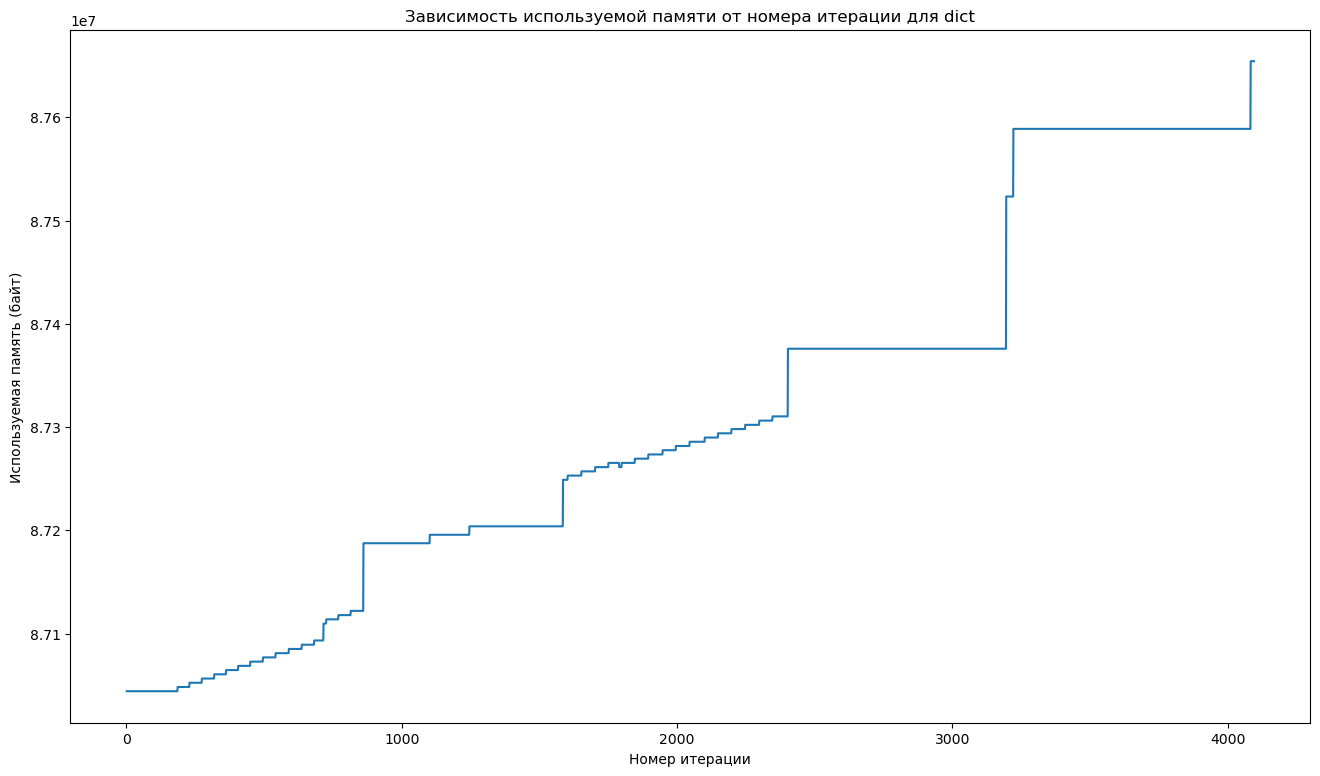

In [9]:
# Построение графика
plt.figure(figsize=(16, 9))
plt.plot(range(1, 4097), memory_usage)
plt.xlabel('Номер итерации')
plt.ylabel('Используемая память (байт)')
plt.title('Зависимость используемой памяти от номера итерации для dict')
plt.show()

##### Выводы:

* Словарь требует больше памяти для хранения ключей и значений по сравнению со списком.

* График будет показывать более резкое увеличение используемой памяти, особенно на начальных этапах, когда словарь еще не оптимизирован.

###### 4. Переполняем стек вызовов
* 4.1. Напишите программу, заполняющую список числами от 4096 используя рекурсию (https://en.wikipedia.org/wiki/Recursion_(computer_science))
* 4.2. Замерьте время исполнения, сравните со временем, необходимым для аналогичной операции с использованием циклов
* 4.3. На каждом этапе рекурсии исследуйте размер стека вызовов (используйте модуль inspect)
* 4.4. Соновываясь на результатах пунктов 4.2 и 4.3 определите накладные расходы по врмени на вызов функций и работу со стеком вызовов


In [1]:
def recursive_append(lst, n):
    if n == 0:
        return
    lst.append(n)
    recursive_append(lst, n-1)

In [85]:
import sys

In [13]:
# Создание пустого списка
my_list = []

# Замер времени исполнения
start_time = time.time()
recursive_append(my_list, 4096)
end_time = time.time()

print(f"Время исполнения с использованием рекурсии: {end_time - start_time} сек")

RecursionError: maximum recursion depth exceeded

In [15]:
# Создание пустого списка
my_list = []

# Замер времени исполнения
start_time = time.time()
recursive_append(my_list, 2971)
end_time = time.time()

print(f"Время исполнения с использованием рекурсии: {end_time - start_time:.9f} сек")

Время исполнения с использованием рекурсии: 0.000996828 сек


In [16]:
my_list

[2971,
 2970,
 2969,
 2968,
 2967,
 2966,
 2965,
 2964,
 2963,
 2962,
 2961,
 2960,
 2959,
 2958,
 2957,
 2956,
 2955,
 2954,
 2953,
 2952,
 2951,
 2950,
 2949,
 2948,
 2947,
 2946,
 2945,
 2944,
 2943,
 2942,
 2941,
 2940,
 2939,
 2938,
 2937,
 2936,
 2935,
 2934,
 2933,
 2932,
 2931,
 2930,
 2929,
 2928,
 2927,
 2926,
 2925,
 2924,
 2923,
 2922,
 2921,
 2920,
 2919,
 2918,
 2917,
 2916,
 2915,
 2914,
 2913,
 2912,
 2911,
 2910,
 2909,
 2908,
 2907,
 2906,
 2905,
 2904,
 2903,
 2902,
 2901,
 2900,
 2899,
 2898,
 2897,
 2896,
 2895,
 2894,
 2893,
 2892,
 2891,
 2890,
 2889,
 2888,
 2887,
 2886,
 2885,
 2884,
 2883,
 2882,
 2881,
 2880,
 2879,
 2878,
 2877,
 2876,
 2875,
 2874,
 2873,
 2872,
 2871,
 2870,
 2869,
 2868,
 2867,
 2866,
 2865,
 2864,
 2863,
 2862,
 2861,
 2860,
 2859,
 2858,
 2857,
 2856,
 2855,
 2854,
 2853,
 2852,
 2851,
 2850,
 2849,
 2848,
 2847,
 2846,
 2845,
 2844,
 2843,
 2842,
 2841,
 2840,
 2839,
 2838,
 2837,
 2836,
 2835,
 2834,
 2833,
 2832,
 2831,
 2830,
 2829,

##### 4.2. Замерьте время исполнения, сравните со временем, необходимым для аналогичной операции с использованием циклов

In [25]:
# Создание пустого списка
my_list = []

# Замер времени исполнения
start_time = time.time()
for i in range(4096, 0, -1):
    my_list.append(i)
end_time = time.time()

print(f"Время исполнения с использованием циклов: {end_time - start_time:.9f} сек")

Время исполнения с использованием циклов: 0.001026392 сек


In [26]:
# Создание пустого списка
my_list = []

# Замер времени исполнения
start_time = time.time()
for i in range(2971, 0, -1):
    my_list.append(i)
end_time = time.time()

print(f"Время исполнения с использованием циклов: {end_time - start_time:.9f} сек")

Время исполнения с использованием циклов: 0.000485659 сек


##### 4.3. На каждом этапе рекурсии исследуйте размер стека вызовов (используйте модуль inspect)

In [27]:
import inspect

In [28]:
def recursive_append_with_stack(lst, n):
    if n == 0:
        return
    lst.append(n)
    print(f"Глубина стека вызовов: {len(inspect.stack())}")
    recursive_append_with_stack(lst, n-1)

In [29]:
# Создание пустого списка
my_list = []

# Замер времени исполнения
start_time = time.time()
recursive_append_with_stack(my_list, 4096)
end_time = time.time()

print(f"Время исполнения с использованием рекурсии и замера стека: {end_time - start_time} сек")

Глубина стека вызовов: 23
Глубина стека вызовов: 24
Глубина стека вызовов: 25
Глубина стека вызовов: 26
Глубина стека вызовов: 27
Глубина стека вызовов: 28
Глубина стека вызовов: 29
Глубина стека вызовов: 30
Глубина стека вызовов: 31
Глубина стека вызовов: 32
Глубина стека вызовов: 33
Глубина стека вызовов: 34
Глубина стека вызовов: 35
Глубина стека вызовов: 36
Глубина стека вызовов: 37
Глубина стека вызовов: 38
Глубина стека вызовов: 39
Глубина стека вызовов: 40
Глубина стека вызовов: 41
Глубина стека вызовов: 42
Глубина стека вызовов: 43
Глубина стека вызовов: 44
Глубина стека вызовов: 45
Глубина стека вызовов: 46
Глубина стека вызовов: 47
Глубина стека вызовов: 48
Глубина стека вызовов: 49
Глубина стека вызовов: 50
Глубина стека вызовов: 51
Глубина стека вызовов: 52
Глубина стека вызовов: 53
Глубина стека вызовов: 54
Глубина стека вызовов: 55
Глубина стека вызовов: 56
Глубина стека вызовов: 57
Глубина стека вызовов: 58
Глубина стека вызовов: 59
Глубина стека вызовов: 60
Глубина стек

Глубина стека вызовов: 330
Глубина стека вызовов: 331
Глубина стека вызовов: 332
Глубина стека вызовов: 333
Глубина стека вызовов: 334
Глубина стека вызовов: 335
Глубина стека вызовов: 336
Глубина стека вызовов: 337
Глубина стека вызовов: 338
Глубина стека вызовов: 339
Глубина стека вызовов: 340
Глубина стека вызовов: 341
Глубина стека вызовов: 342
Глубина стека вызовов: 343
Глубина стека вызовов: 344
Глубина стека вызовов: 345
Глубина стека вызовов: 346
Глубина стека вызовов: 347
Глубина стека вызовов: 348
Глубина стека вызовов: 349
Глубина стека вызовов: 350
Глубина стека вызовов: 351
Глубина стека вызовов: 352
Глубина стека вызовов: 353
Глубина стека вызовов: 354
Глубина стека вызовов: 355
Глубина стека вызовов: 356
Глубина стека вызовов: 357
Глубина стека вызовов: 358
Глубина стека вызовов: 359
Глубина стека вызовов: 360
Глубина стека вызовов: 361
Глубина стека вызовов: 362
Глубина стека вызовов: 363
Глубина стека вызовов: 364
Глубина стека вызовов: 365
Глубина стека вызовов: 366
Г

Глубина стека вызовов: 634
Глубина стека вызовов: 635
Глубина стека вызовов: 636
Глубина стека вызовов: 637
Глубина стека вызовов: 638
Глубина стека вызовов: 639
Глубина стека вызовов: 640
Глубина стека вызовов: 641
Глубина стека вызовов: 642
Глубина стека вызовов: 643
Глубина стека вызовов: 644
Глубина стека вызовов: 645
Глубина стека вызовов: 646
Глубина стека вызовов: 647
Глубина стека вызовов: 648
Глубина стека вызовов: 649
Глубина стека вызовов: 650
Глубина стека вызовов: 651
Глубина стека вызовов: 652
Глубина стека вызовов: 653
Глубина стека вызовов: 654
Глубина стека вызовов: 655
Глубина стека вызовов: 656
Глубина стека вызовов: 657
Глубина стека вызовов: 658
Глубина стека вызовов: 659
Глубина стека вызовов: 660
Глубина стека вызовов: 661
Глубина стека вызовов: 662
Глубина стека вызовов: 663
Глубина стека вызовов: 664
Глубина стека вызовов: 665
Глубина стека вызовов: 666
Глубина стека вызовов: 667
Глубина стека вызовов: 668
Глубина стека вызовов: 669
Глубина стека вызовов: 670
Г

Глубина стека вызовов: 938
Глубина стека вызовов: 939
Глубина стека вызовов: 940
Глубина стека вызовов: 941
Глубина стека вызовов: 942
Глубина стека вызовов: 943
Глубина стека вызовов: 944
Глубина стека вызовов: 945
Глубина стека вызовов: 946
Глубина стека вызовов: 947
Глубина стека вызовов: 948
Глубина стека вызовов: 949
Глубина стека вызовов: 950
Глубина стека вызовов: 951
Глубина стека вызовов: 952
Глубина стека вызовов: 953
Глубина стека вызовов: 954
Глубина стека вызовов: 955
Глубина стека вызовов: 956
Глубина стека вызовов: 957
Глубина стека вызовов: 958
Глубина стека вызовов: 959
Глубина стека вызовов: 960
Глубина стека вызовов: 961
Глубина стека вызовов: 962
Глубина стека вызовов: 963
Глубина стека вызовов: 964
Глубина стека вызовов: 965
Глубина стека вызовов: 966
Глубина стека вызовов: 967
Глубина стека вызовов: 968
Глубина стека вызовов: 969
Глубина стека вызовов: 970
Глубина стека вызовов: 971
Глубина стека вызовов: 972
Глубина стека вызовов: 973
Глубина стека вызовов: 974
Г

Глубина стека вызовов: 1233
Глубина стека вызовов: 1234
Глубина стека вызовов: 1235
Глубина стека вызовов: 1236
Глубина стека вызовов: 1237
Глубина стека вызовов: 1238
Глубина стека вызовов: 1239
Глубина стека вызовов: 1240
Глубина стека вызовов: 1241
Глубина стека вызовов: 1242
Глубина стека вызовов: 1243
Глубина стека вызовов: 1244
Глубина стека вызовов: 1245
Глубина стека вызовов: 1246
Глубина стека вызовов: 1247
Глубина стека вызовов: 1248
Глубина стека вызовов: 1249
Глубина стека вызовов: 1250
Глубина стека вызовов: 1251
Глубина стека вызовов: 1252
Глубина стека вызовов: 1253
Глубина стека вызовов: 1254
Глубина стека вызовов: 1255
Глубина стека вызовов: 1256
Глубина стека вызовов: 1257
Глубина стека вызовов: 1258
Глубина стека вызовов: 1259
Глубина стека вызовов: 1260
Глубина стека вызовов: 1261
Глубина стека вызовов: 1262
Глубина стека вызовов: 1263
Глубина стека вызовов: 1264
Глубина стека вызовов: 1265
Глубина стека вызовов: 1266
Глубина стека вызовов: 1267
Глубина стека вызово

Глубина стека вызовов: 1526
Глубина стека вызовов: 1527
Глубина стека вызовов: 1528
Глубина стека вызовов: 1529
Глубина стека вызовов: 1530
Глубина стека вызовов: 1531
Глубина стека вызовов: 1532
Глубина стека вызовов: 1533
Глубина стека вызовов: 1534
Глубина стека вызовов: 1535
Глубина стека вызовов: 1536
Глубина стека вызовов: 1537
Глубина стека вызовов: 1538
Глубина стека вызовов: 1539
Глубина стека вызовов: 1540
Глубина стека вызовов: 1541
Глубина стека вызовов: 1542
Глубина стека вызовов: 1543
Глубина стека вызовов: 1544
Глубина стека вызовов: 1545
Глубина стека вызовов: 1546
Глубина стека вызовов: 1547
Глубина стека вызовов: 1548
Глубина стека вызовов: 1549
Глубина стека вызовов: 1550
Глубина стека вызовов: 1551
Глубина стека вызовов: 1552
Глубина стека вызовов: 1553
Глубина стека вызовов: 1554
Глубина стека вызовов: 1555
Глубина стека вызовов: 1556
Глубина стека вызовов: 1557
Глубина стека вызовов: 1558
Глубина стека вызовов: 1559
Глубина стека вызовов: 1560
Глубина стека вызово

Глубина стека вызовов: 1819
Глубина стека вызовов: 1820
Глубина стека вызовов: 1821
Глубина стека вызовов: 1822
Глубина стека вызовов: 1823
Глубина стека вызовов: 1824
Глубина стека вызовов: 1825
Глубина стека вызовов: 1826
Глубина стека вызовов: 1827
Глубина стека вызовов: 1828
Глубина стека вызовов: 1829
Глубина стека вызовов: 1830
Глубина стека вызовов: 1831
Глубина стека вызовов: 1832
Глубина стека вызовов: 1833
Глубина стека вызовов: 1834
Глубина стека вызовов: 1835
Глубина стека вызовов: 1836
Глубина стека вызовов: 1837
Глубина стека вызовов: 1838
Глубина стека вызовов: 1839
Глубина стека вызовов: 1840
Глубина стека вызовов: 1841
Глубина стека вызовов: 1842
Глубина стека вызовов: 1843
Глубина стека вызовов: 1844
Глубина стека вызовов: 1845
Глубина стека вызовов: 1846
Глубина стека вызовов: 1847
Глубина стека вызовов: 1848
Глубина стека вызовов: 1849
Глубина стека вызовов: 1850
Глубина стека вызовов: 1851
Глубина стека вызовов: 1852
Глубина стека вызовов: 1853
Глубина стека вызово

Глубина стека вызовов: 2112
Глубина стека вызовов: 2113
Глубина стека вызовов: 2114
Глубина стека вызовов: 2115
Глубина стека вызовов: 2116
Глубина стека вызовов: 2117
Глубина стека вызовов: 2118
Глубина стека вызовов: 2119
Глубина стека вызовов: 2120
Глубина стека вызовов: 2121
Глубина стека вызовов: 2122
Глубина стека вызовов: 2123
Глубина стека вызовов: 2124
Глубина стека вызовов: 2125
Глубина стека вызовов: 2126
Глубина стека вызовов: 2127
Глубина стека вызовов: 2128
Глубина стека вызовов: 2129
Глубина стека вызовов: 2130
Глубина стека вызовов: 2131
Глубина стека вызовов: 2132
Глубина стека вызовов: 2133
Глубина стека вызовов: 2134
Глубина стека вызовов: 2135
Глубина стека вызовов: 2136
Глубина стека вызовов: 2137
Глубина стека вызовов: 2138
Глубина стека вызовов: 2139
Глубина стека вызовов: 2140
Глубина стека вызовов: 2141
Глубина стека вызовов: 2142
Глубина стека вызовов: 2143
Глубина стека вызовов: 2144
Глубина стека вызовов: 2145
Глубина стека вызовов: 2146
Глубина стека вызово

Глубина стека вызовов: 2405
Глубина стека вызовов: 2406
Глубина стека вызовов: 2407
Глубина стека вызовов: 2408
Глубина стека вызовов: 2409
Глубина стека вызовов: 2410
Глубина стека вызовов: 2411
Глубина стека вызовов: 2412
Глубина стека вызовов: 2413
Глубина стека вызовов: 2414
Глубина стека вызовов: 2415
Глубина стека вызовов: 2416
Глубина стека вызовов: 2417
Глубина стека вызовов: 2418
Глубина стека вызовов: 2419
Глубина стека вызовов: 2420
Глубина стека вызовов: 2421
Глубина стека вызовов: 2422
Глубина стека вызовов: 2423
Глубина стека вызовов: 2424
Глубина стека вызовов: 2425
Глубина стека вызовов: 2426
Глубина стека вызовов: 2427
Глубина стека вызовов: 2428
Глубина стека вызовов: 2429
Глубина стека вызовов: 2430
Глубина стека вызовов: 2431
Глубина стека вызовов: 2432
Глубина стека вызовов: 2433
Глубина стека вызовов: 2434
Глубина стека вызовов: 2435
Глубина стека вызовов: 2436
Глубина стека вызовов: 2437
Глубина стека вызовов: 2438
Глубина стека вызовов: 2439
Глубина стека вызово

Глубина стека вызовов: 2698
Глубина стека вызовов: 2699
Глубина стека вызовов: 2700
Глубина стека вызовов: 2701
Глубина стека вызовов: 2702
Глубина стека вызовов: 2703
Глубина стека вызовов: 2704
Глубина стека вызовов: 2705
Глубина стека вызовов: 2706
Глубина стека вызовов: 2707
Глубина стека вызовов: 2708
Глубина стека вызовов: 2709
Глубина стека вызовов: 2710
Глубина стека вызовов: 2711
Глубина стека вызовов: 2712
Глубина стека вызовов: 2713
Глубина стека вызовов: 2714
Глубина стека вызовов: 2715
Глубина стека вызовов: 2716
Глубина стека вызовов: 2717
Глубина стека вызовов: 2718
Глубина стека вызовов: 2719
Глубина стека вызовов: 2720
Глубина стека вызовов: 2721
Глубина стека вызовов: 2722
Глубина стека вызовов: 2723
Глубина стека вызовов: 2724
Глубина стека вызовов: 2725
Глубина стека вызовов: 2726
Глубина стека вызовов: 2727
Глубина стека вызовов: 2728
Глубина стека вызовов: 2729
Глубина стека вызовов: 2730
Глубина стека вызовов: 2731
Глубина стека вызовов: 2732
Глубина стека вызово

RecursionError: maximum recursion depth exceeded while calling a Python object

##### 4.4. Соновываясь на результатах пунктов 4.2 и 4.3 определите накладные расходы по врмени на вызов функций и работу со стеком вызовов

* Время исполнения с использованием рекурсии будет больше, чем с использованием циклов, из-за накладных расходов на вызов функций и работу со стеком вызовов.

* Глубина стека вызовов будет увеличиваться с каждым вызовом функции, что может привести к переполнению стека при большой глубине рекурсии.

* Увеличение глубины стека вызовов с помощью sys.setrecursionlimit позволяет избежать ошибки RecursionError, но не решает проблему накладных расходов на рекурсивные вызовы.

* При исследовании стека вызовов можно заметить, что во время работы программы (для рекурсии) процесс заполнения стека приводит к снижению скорости отклика памяти (сервера) - к моменту вычисления последних шагов в рекурсии скорость отклика падает до одного раза в несколько секунд. Программа прекратила работу на 2986 шаге 